# Análisis de Mascotas de Compañía en Madrid

Supongamos que deseamos explorar posibles ubicaciones para abrir una tienda de mascotas en Madrid. Este análisis se centrará en identificar los distritos y barrios más prometedores basándonos en dos fuentes principales de datos:

1. **Información sobre Áreas Caninas:** Utilizaremos datos que incluyen ubicaciones específicas por distrito, barrio y dirección de estas áreas, lo cual nos ayudará a entender mejor dónde están concentradas las mascotas en la ciudad.
   
2. **Censo de Animales Domésticos:** Examinaremos los datos del censo que proporcionan una visión detallada de la distribución de animales domésticos por distrito, permitiéndonos identificar las áreas con mayor cantidad de mascotas potenciales.


Librerías a Usar


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

Cargamos los csvs

In [2]:
df_can = pd.read_csv("areas_caninas_2023.csv", encoding= 'utf-8', sep = ';')

df_censo = pd.read_csv("censo_animales.csv", encoding= 'utf-8', sep = ';')

### EDA Distritos

In [3]:
df_can.head()

,"MXASSETNUM,C,12","DESCRIPTIO,C,105","MINTDISTRI,C,20","NOMBRE_DIS,C,100","MINTBARRIO,C,10","NOMBRE_BAR,C,100","INSTALLDAT,D","MINTTIPOVI,C,15","MINTNOMBRE,C,254","MINTNUMERO,C,25","MINTNDP,C,20","TIPO,C,254","TOTAL_ELEM,N,10,0","ESTADO,C,50"
0,7243273,C0708 - Canina - PARQUE ENRIQUE HERREROS,7,CHAMBERI,76,VALLEHERMOSO,28/10/20,CALLE,CEA BERMUDEZ,2,11042483.0,CANINAS,5,ACTIVO
1,5237097,NaN,16,HORTALEZA,166,VALDEFUENTES,NaN,AVENIDA,Avenida de las Fuerzas Armadas,11,NaN,CANINAS,1,ACTIVO
2,5237098,NaN,16,HORTALEZA,166,VALDEFUENTES,NaN,AVENIDA,Avenida de las Fuerzas Armadas,11,NaN,CANINAS,0,ACTIVO
3,5237100,NaN,16,HORTALEZA,166,VALDEFUENTES,NaN,AVENIDA,Avenida de las Fuerzas Armadas,11,NaN,CANINAS,0,ACTIVO
4,5003498,C0604 - Canina - C/ MARTIRES DE PARACUELLOS Nº2,6,TETUAN,62,CUATRO CAMINOS,01/01/04,CALLE,GENERAL RAMIREZ DE MADRID,2,31031752.0,CANINAS,1,ACTIVO


In [39]:
df_can.info()

<class 'pandas.core.frame.DataFrame'>
Index: 134 entries, 0 to 152
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   id                   134 non-null    int64         
 1   descripcion_general  130 non-null    object        
 2   codigo_distrito      134 non-null    int64         
 3   nombre_distrito      134 non-null    object        
 4   codigo_barrio        134 non-null    int64         
 5   nombre_barrio        134 non-null    object        
 6   fecha_instalacion    128 non-null    datetime64[ns]
 7   descripcion_vial     132 non-null    object        
 8   nombre_via           132 non-null    object        
 9   numero_portal        132 non-null    object        
 10  numero_policia       126 non-null    float64       
 11  tipo_area            134 non-null    object        
 12  total_elementos      134 non-null    int64         
 13  estado               134 non-null    obj

In [40]:
df_can.describe()

,id,codigo_distrito,codigo_barrio,fecha_instalacion,numero_policia,total_elementos
count,1.340000e+02,134.000000,134.000000,128,1.260000e+02,134.000000
mean,4.913372e+06,11.992537,123.686567,2010-06-18 09:00:00,2.009651e+07,1.425373
min,3.569057e+06,1.000000,12.000000,2004-01-01 00:00:00,1.100227e+07,0.000000
25%,4.996514e+06,8.000000,83.000000,2004-01-01 00:00:00,1.108550e+07,0.000000
50%,4.996568e+06,12.000000,126.000000,2013-01-08 00:00:00,2.008042e+07,0.000000
75%,5.003414e+06,16.000000,166.000000,2013-01-08 00:00:00,3.100864e+07,1.000000
max,9.291120e+06,21.000000,213.000000,2022-09-21 00:00:00,3.106038e+07,17.000000
std,9.551853e+05,5.476534,54.691674,NaN,8.145380e+06,3.112857


Renombramos las columnas. Al no tener un formato adecuado para el análisis realizaremos los cambios pertinentes.

In [4]:
renombrar_columnas = {"MXASSETNUM,C,12":"id", 
                      "DESCRIPTIO,C,105": "descripcion_general",
                      "MINTDISTRI,C,20": "codigo_distrito",
                      "NOMBRE_DIS,C,100": "nombre_distrito",
                      "MINTBARRIO,C,10": "codigo_barrio",
                      "NOMBRE_BAR,C,100": "nombre_barrio",
                      "INSTALLDAT,D": "fecha_instalacion",
                      "MINTTIPOVI,C,15": "descripcion_vial",
                      "MINTNOMBRE,C,254": "nombre_via",
                      "MINTNUMERO,C,25": "numero_portal",
                      "MINTNDP,C,20":"numero_policia",
                      "TIPO,C,254": "tipo_area",
                      "TOTAL_ELEM,N,10,0": "total_elementos",
                      "ESTADO,C,50": "estado"
                     }

df_can.rename(columns=renombrar_columnas, inplace=True)
df_can.head()

,id,descripcion_general,codigo_distrito,nombre_distrito,codigo_barrio,nombre_barrio,fecha_instalacion,descripcion_vial,nombre_via,numero_portal,numero_policia,tipo_area,total_elementos,estado
0,7243273,C0708 - Canina - PARQUE ENRIQUE HERREROS,7,CHAMBERI,76,VALLEHERMOSO,28/10/20,CALLE,CEA BERMUDEZ,2,11042483.0,CANINAS,5,ACTIVO
1,5237097,NaN,16,HORTALEZA,166,VALDEFUENTES,NaN,AVENIDA,Avenida de las Fuerzas Armadas,11,NaN,CANINAS,1,ACTIVO
2,5237098,NaN,16,HORTALEZA,166,VALDEFUENTES,NaN,AVENIDA,Avenida de las Fuerzas Armadas,11,NaN,CANINAS,0,ACTIVO
3,5237100,NaN,16,HORTALEZA,166,VALDEFUENTES,NaN,AVENIDA,Avenida de las Fuerzas Armadas,11,NaN,CANINAS,0,ACTIVO
4,5003498,C0604 - Canina - C/ MARTIRES DE PARACUELLOS Nº2,6,TETUAN,62,CUATRO CAMINOS,01/01/04,CALLE,GENERAL RAMIREZ DE MADRID,2,31031752.0,CANINAS,1,ACTIVO


Buscamos rápidamente con una linea de codigo los valores nulos por si son criticos y verificamos que no afectan

<Axes: >

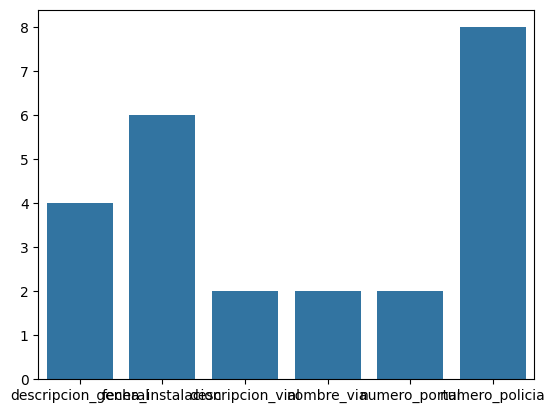

In [35]:
sns.barplot(df_can.drop(df_can.dropna(axis=1).columns, axis=1).isna().sum())

<Axes: >

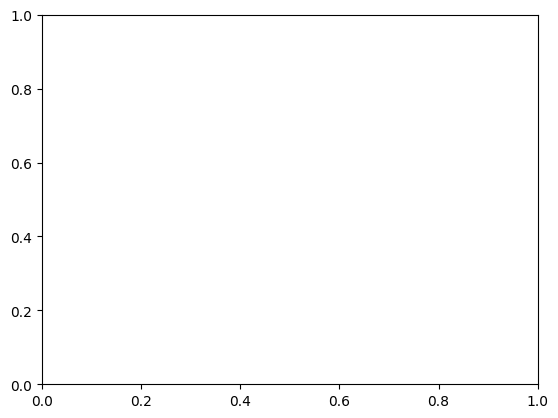

In [36]:
sns.barplot(df_censo.drop(df_censo.dropna(axis=1).columns, axis=1).isna().sum())

Modificación columna descripcion_general

Vamos a quitar los inicios CXXXX - Canina - que tiene cada registro de la columna mencionada.

In [5]:
df_can['descripcion_general'] = df_can['descripcion_general'].apply(lambda x: x.split('-')[-1] if isinstance(x, str) else x)
df_can['descripcion_general'] = df_can['descripcion_general'].apply(lambda x: x.strip() if isinstance(x, str) else x)

Reestructuramos las columnas. 

Organizamos los nombres en las descripciones generales y barrios. También estandarizamos los registros de las columnas.

In [6]:
diccionario_cambio = {'C/': 'Calle', 'AV ':'AVENIDA ', 'PZA.':'PLAZA', 'PÂº':'PLAZA', 'DR.':'DOCTOR', 'C ':'Calle ', 
                    'Ã\x9c':'Ü', 'NÂº':'', 'Ã\x91':'Ñ', 'Ãº':'ú', 'Ã\x93':'Ó', 'Ã\x89':'É'
                    }

for key, value in diccionario_cambio.items():
    df_can['descripcion_general'] = df_can['descripcion_general'].apply(lambda x: x.replace(key, value) if isinstance(x, str) else x)

In [7]:
df_can['nombre_barrio'] = df_can['nombre_barrio'].apply(lambda x: x.replace('Ã\x91', 'Ñ') if isinstance(x, str) else x)

In [8]:
columnas = ['descripcion_general', 'nombre_distrito', 'descripcion_vial', 'estado', 'nombre_barrio', 'tipo_area']

for columna in columnas:
    df_can[columna] = df_can[columna].apply(lambda x: x.title() if isinstance(x, str) else x)

Cambiamos el formato fecha.

In [9]:
df_can['fecha_instalacion'] = pd.to_datetime(df_can['fecha_instalacion'])

C:\Users\memol\AppData\Local\Temp\ipykernel_22952\3106675902.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df_can['fecha_instalacion'] = pd.to_datetime(df_can['fecha_instalacion'])


In [10]:
df_can.head(5)

,id,descripcion_general,codigo_distrito,nombre_distrito,codigo_barrio,nombre_barrio,fecha_instalacion,descripcion_vial,nombre_via,numero_portal,numero_policia,tipo_area,total_elementos,estado
0,7243273,Parque Enrique Herreros,7,Chamberi,76,Vallehermoso,2020-10-28,Calle,CEA BERMUDEZ,2,11042483.0,Caninas,5,Activo
1,5237097,NaN,16,Hortaleza,166,Valdefuentes,NaT,Avenida,Avenida de las Fuerzas Armadas,11,NaN,Caninas,1,Activo
2,5237098,NaN,16,Hortaleza,166,Valdefuentes,NaT,Avenida,Avenida de las Fuerzas Armadas,11,NaN,Caninas,0,Activo
3,5237100,NaN,16,Hortaleza,166,Valdefuentes,NaT,Avenida,Avenida de las Fuerzas Armadas,11,NaN,Caninas,0,Activo
4,5003498,Calle Martires De Paracuellos Nº2,6,Tetuan,62,Cuatro Caminos,2004-01-01,Calle,GENERAL RAMIREZ DE MADRID,2,31031752.0,Caninas,1,Activo


Eliminamos duplicados.

In [11]:
df_can.shape

(153, 14)

In [12]:
df_can.drop_duplicates(subset=df_can.columns[1:], inplace=True)
df_can.shape

(134, 14)

In [43]:
df_can.columns

Index(['id', 'descripcion_general', 'codigo_distrito', 'nombre_distrito',
       'codigo_barrio', 'nombre_barrio', 'fecha_instalacion',
       'descripcion_vial', 'nombre_via', 'numero_portal', 'numero_policia',
       'tipo_area', 'total_elementos', 'estado'],
      dtype='object')

Conteo de áreas caninas por distrito ordenados.

In [13]:
areas_caninas_por_distrito = df_can.groupby('nombre_distrito').agg({"id": "count"})
areas_caninas_por_distrito.reset_index(inplace=True)

areas_caninas_por_distrito.sort_values(by='id', ascending=False, inplace=True)

areas_caninas_por_distrito.head()

,nombre_distrito,id
18,Vicalvaro,11
15,San Blas - Canillejas,11
6,Ciudad Lineal,11
10,Moncloa - Aravaca,10
16,Tetuan,9


Estos 5 primeros distritos parecen buenos candidatos para enfocarse en el análisis.

C:\Users\memol\AppData\Local\Temp\ipykernel_22952\358928745.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=conteo_distritos.index, y=conteo_distritos.values, palette='viridis')


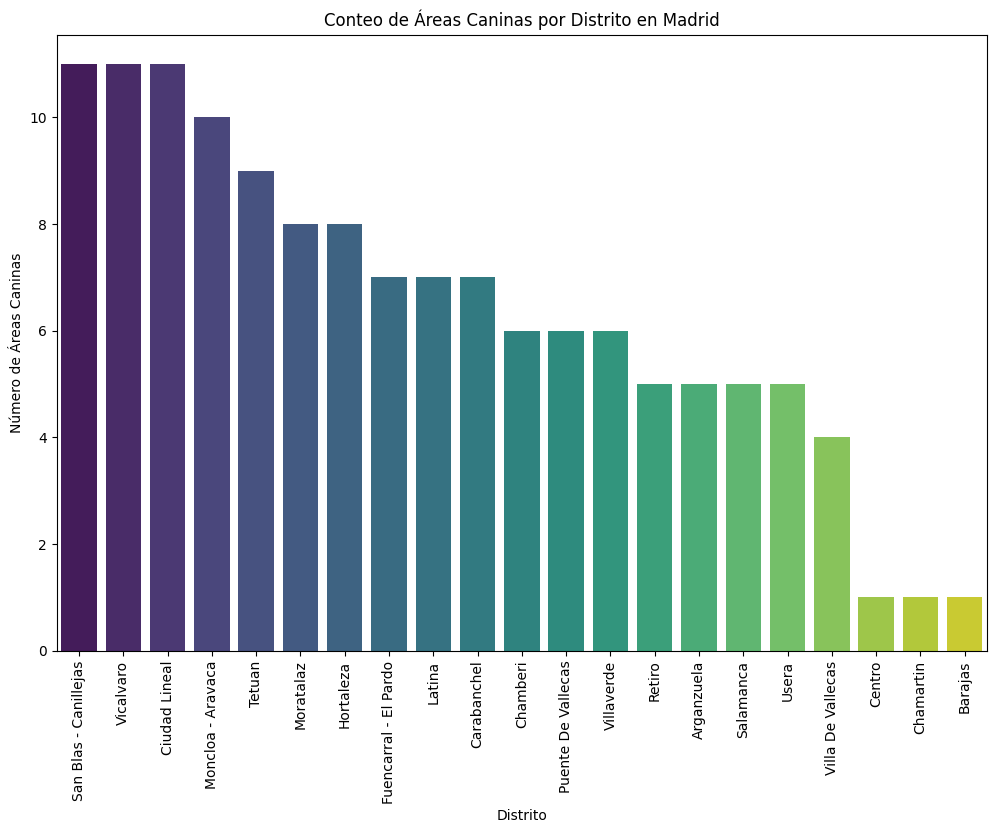

In [46]:
conteo_distritos = df_can['nombre_distrito'].value_counts().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x=conteo_distritos.index, y=conteo_distritos.values, palette='viridis')
plt.title('Conteo de Áreas Caninas por Distrito en Madrid')
plt.xlabel('Distrito')
plt.ylabel('Número de Áreas Caninas')
plt.xticks(rotation=90)  
plt.show()

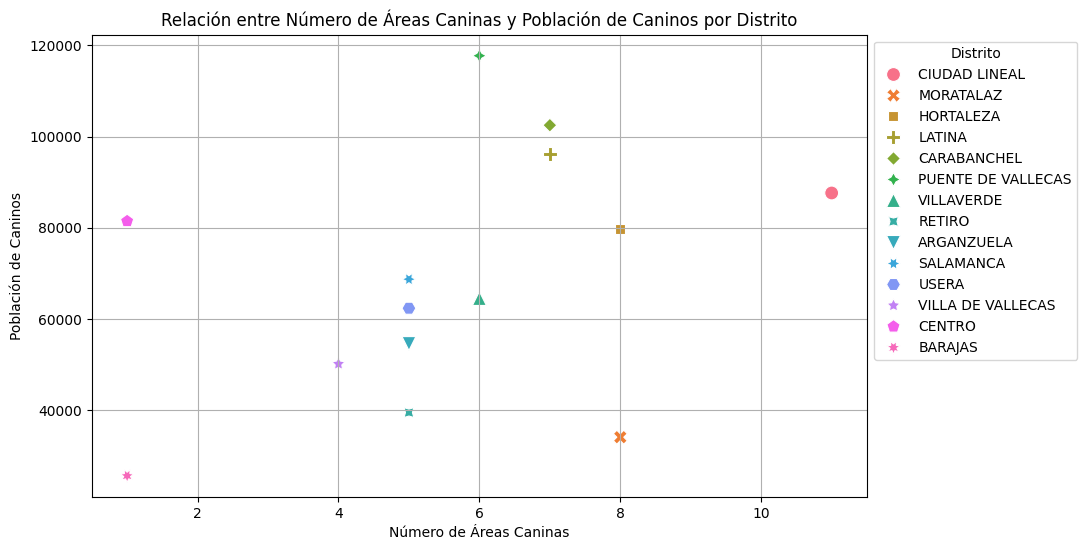

In [59]:
df_can['nombre_distrito'] = df_can['nombre_distrito'].str.upper().str.strip()
df_censo['DISTRITO'] = df_censo['DISTRITO'].str.upper().str.strip()

conteo_distritos = df_can['nombre_distrito'].value_counts().reset_index()
conteo_distritos.columns = ['DISTRITO', 'Número de Áreas Caninas']

total_caninos_por_distrito = df_censo.groupby('DISTRITO')['ESPECIE CANINA'].sum().reset_index()

df_merge = pd.merge(conteo_distritos, total_caninos_por_distrito, on='DISTRITO', how='inner')

if df_merge.empty:
    print("No hay datos para graficar. Verifique los nombres de los distritos en ambos dataframes.")
else:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df_merge, x='Número de Áreas Caninas', y='ESPECIE CANINA', hue='DISTRITO', style='DISTRITO', s=100)
    plt.title('Relación entre Número de Áreas Caninas y Población de Caninos por Distrito')
    plt.xlabel('Número de Áreas Caninas')
    plt.ylabel('Población de Caninos')
    plt.legend(title='Distrito', bbox_to_anchor=(1.0, 1), loc='upper left')
    plt.grid(True)
    plt.show()

### EDA Censo animales

In [15]:
df_censo.head()

,AÑO,DISTRITO,ESPECIE CANINA,ESPECIE FELINA
0,2022,ARGANZUELA,11894,5951
1,2022,BARAJAS,5087,1751
2,2022,CARABANCHEL,20833,8420
3,2022,CENTRO,16943,10645
4,2022,CHAMARTÍN,11289,4323


In [16]:
df_censo['AÑO'].unique()

array([2022, 2021, 2020, 2019, 2018, 2017, 2016, 2015, 2014], dtype=int64)

Nos quedamos con el censo de los últimos 5 años.

In [17]:
df_censo = df_censo[df_censo['AÑO'] >= 2018]
df_censo.head(5)

,AÑO,DISTRITO,ESPECIE CANINA,ESPECIE FELINA
0,2022,ARGANZUELA,11894,5951
1,2022,BARAJAS,5087,1751
2,2022,CARABANCHEL,20833,8420
3,2022,CENTRO,16943,10645
4,2022,CHAMARTÍN,11289,4323


In [18]:
df_censo['AÑO'].unique()

array([2022, 2021, 2020, 2019, 2018], dtype=int64)

Total de animales por especie.

In [19]:
total_animales = df_censo.groupby(['AÑO']).agg({'ESPECIE CANINA': 'sum', 'ESPECIE FELINA': 'sum'})
total_animales.reset_index(inplace= True)
total_animales.head()

,AÑO,ESPECIE CANINA,ESPECIE FELINA
0,2018,278460,91558
1,2019,276873,105683
2,2020,280002,108750
3,2021,282315,113991
4,2022,283935,126522


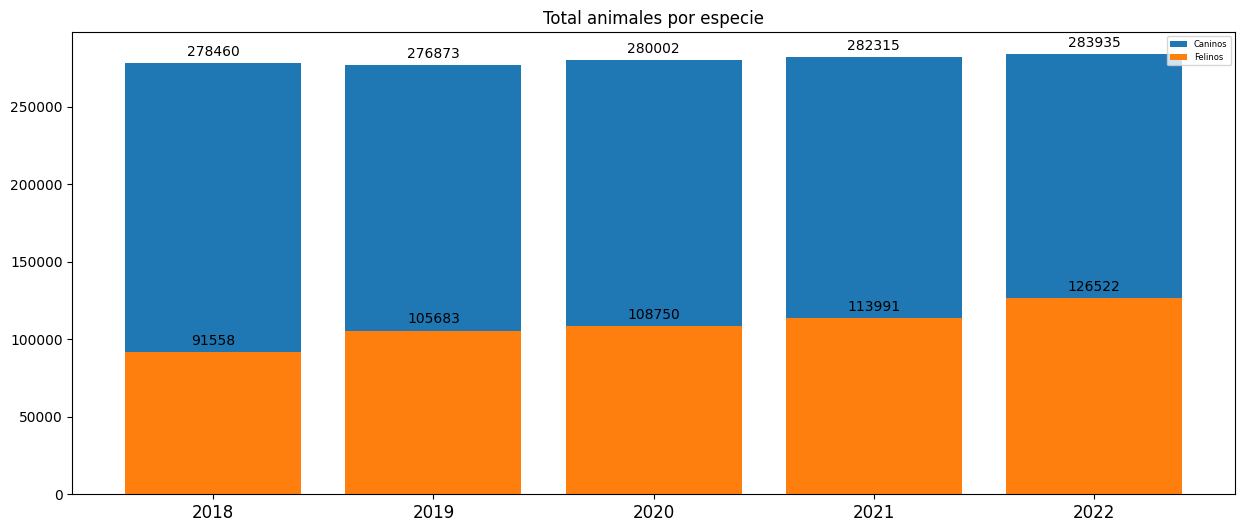

In [20]:
fig, ax = plt.subplots(figsize=(15,6))
ax.set_title("Total animales por especie")

anios = total_animales['AÑO'].values
total_caninos = total_animales['ESPECIE CANINA'].values
total_felinos = total_animales['ESPECIE FELINA'].values


plot_1 = ax.bar(x=anios, height=total_caninos, label='Caninos')
plot_2 = ax.bar(x=anios, height=total_felinos, label='Felinos')
plt.xticks(ticks=anios, labels=anios, fontsize = 12)
ax.legend(fontsize=6)
ax.bar_label(plot_1, padding=3)
ax.bar_label(plot_2, padding=3)
plt.show()

Sacamos los porcentajes de crecimiento por la clara tendencia que vemos en los números.

In [21]:
cantidad_caninos_2018 = total_animales.iloc[0,1]
cantidad_caninos_2022 = total_animales.iloc[-1,1]

aumento_caninos = cantidad_caninos_2022 - cantidad_caninos_2018
aumento_caninos

5475

In [22]:
porcentaje_aumento_caninos = (aumento_caninos*100)/cantidad_caninos_2022
porcentaje_aumento_caninos = round(porcentaje_aumento_caninos, 1)
porcentaje_aumento_caninos

1.9

Un aumento de perros censados de casi un 2% en 5 años.

In [23]:
cantidad_felinos_2018 = total_animales.iloc[0,2]
cantidad_felinos_2022 = total_animales.iloc[-1,2]

aumento_felinos = cantidad_felinos_2022 - cantidad_felinos_2018
aumento_felinos

34964

In [24]:
porcentaje_aumento_felinos = (aumento_caninos*100)/cantidad_felinos_2022
porcentaje_aumento_felinos = round(porcentaje_aumento_felinos, 1)
porcentaje_aumento_felinos

4.3

Y de gatos censados, un 4,3%

### Total de caninos por distrito y año.

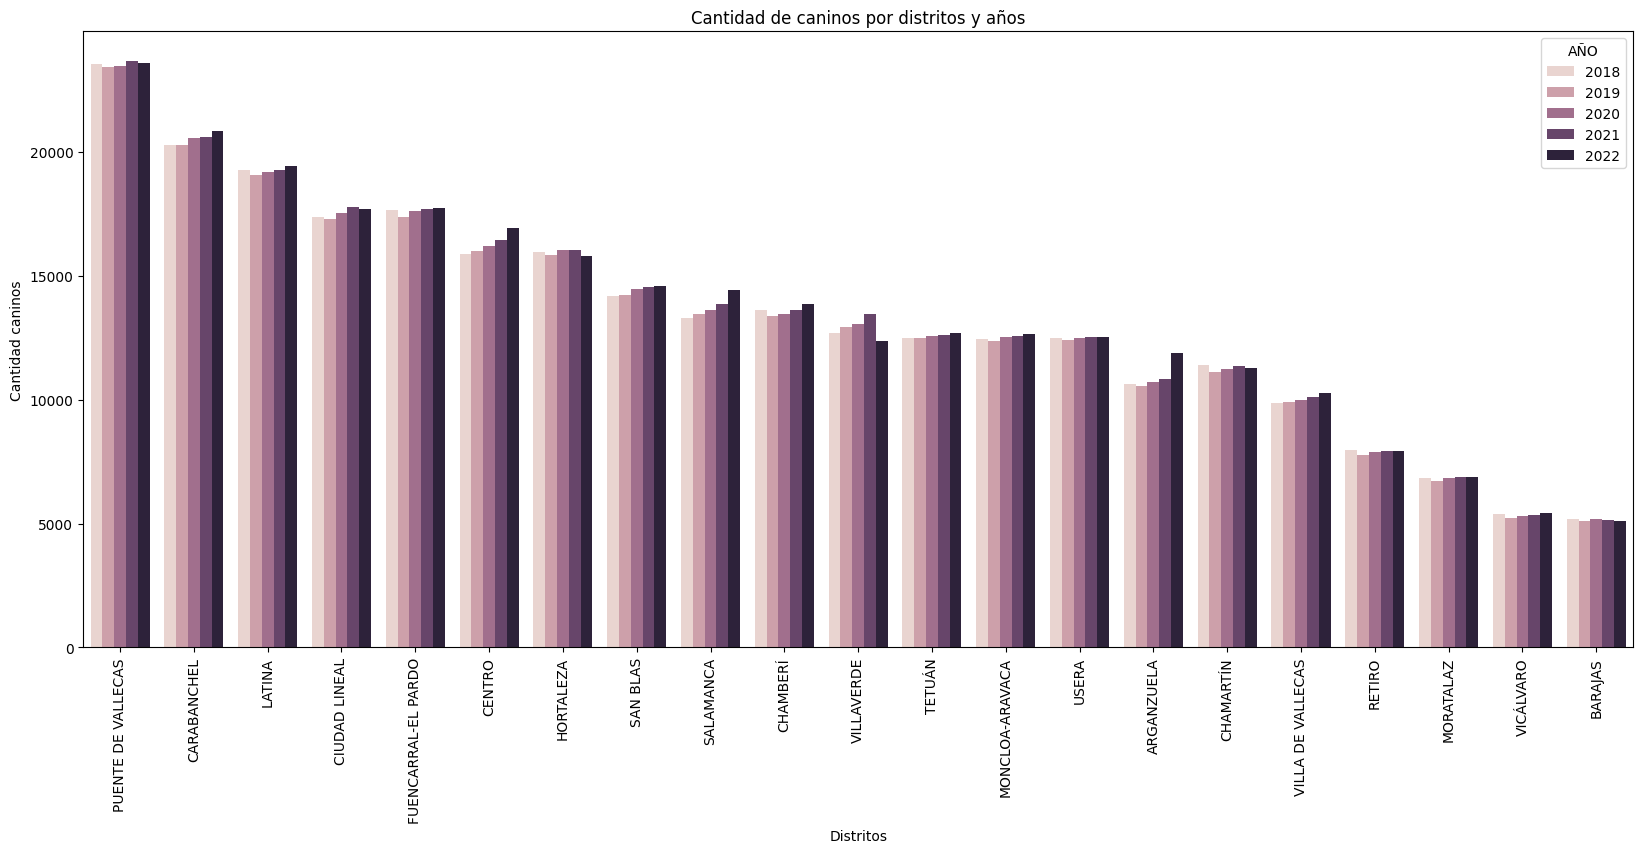

In [25]:
plt.figure(figsize=(20,8))
sns.barplot(data=df_censo.sort_values(by='ESPECIE CANINA', ascending=False), x='DISTRITO', y='ESPECIE CANINA', hue='AÑO')
plt.title('Cantidad de caninos por distritos y años')
plt.xlabel('Distritos')
plt.ylabel('Cantidad caninos')
plt.xticks(rotation=90)
plt.show()

Observación: esta información es vital ya que realmente nos indica en qué distritos podemos enfocarnos para buscar nuestra tienda de mascotas, aquí nos podemos quedar con los  
6 distritos con más número de caninos:

* Puente de Vallecas.

* Carabanchel.

* Latina

* Ciudad Lineal.

* Fuentecarral el pardo.

* Centro

### Total de felinos por distrito y año.

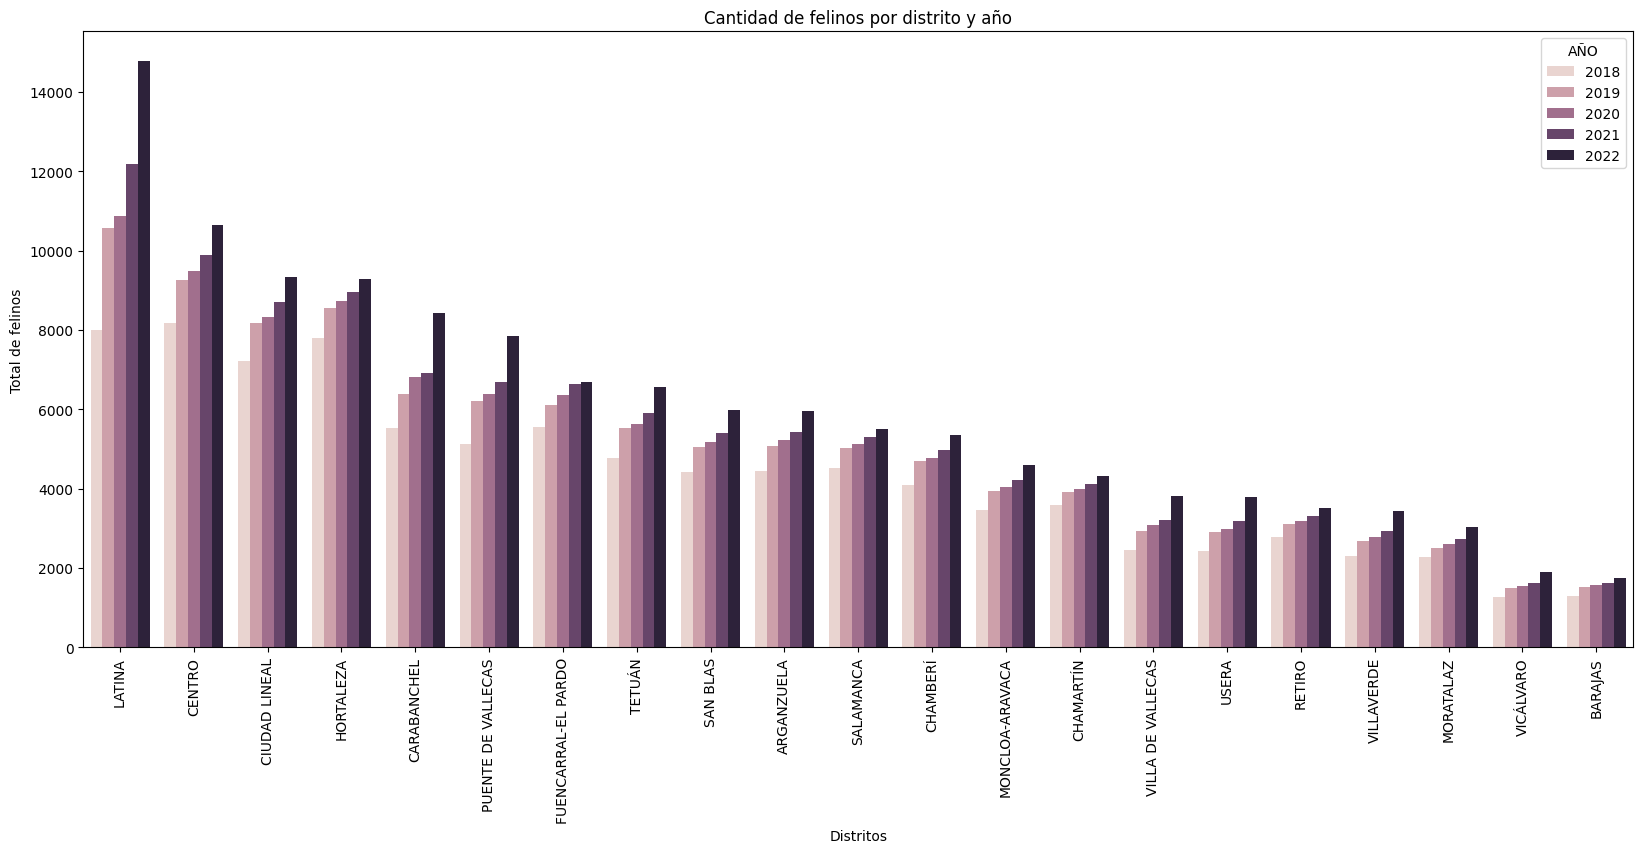

In [38]:
plt.figure(figsize=(20,8))
sns.barplot(data=df_censo.sort_values(by='ESPECIE FELINA', ascending=False), x='DISTRITO', y='ESPECIE FELINA', hue='AÑO', estimator='sum')
plt.title('Cantidad de felinos por distrito y año')
plt.xlabel('Distritos')
plt.ylabel('Total de felinos')
plt.xticks(rotation=90)
plt.show()

Observación: primero notamos que hay un gran aumento de felinos para cada uno de los distritos (en comparación con los caninos) y en este caso nos quedamos con los siguientes  
6 distritos:

* Latina.

* Centro.

* Ciudad Lineal.

* Horaleza.

* Carabanchel.

* Puente de Vallecas.

Top 6 distritos con mayor cantidad de caninos.

Nos enfocamos en seleccionar los 6 distritos con mayor cantidad de caninos con el fin de relacionarlo con las áreas caninas.

In [27]:
censo_animales_distritos = df_censo.sort_values(by=['ESPECIE CANINA'], ascending=False).copy()
censo_animales_distritos.head()

,AÑO,DISTRITO,ESPECIE CANINA,ESPECIE FELINA
33,2021,PUENTE DE VALLECAS,23675,6699
12,2022,PUENTE DE VALLECAS,23595,7855
96,2018,PUENTE DE VALLECAS,23526,5138
54,2020,PUENTE DE VALLECAS,23485,6395
75,2019,PUENTE DE VALLECAS,23437,6208


In [28]:
distritos_mayor_cantidad_caninos = [elemento.title().replace('-', ' - ') for elemento in censo_animales_distritos['DISTRITO'].unique()[:6]]
distritos_mayor_cantidad_caninos

['Puente De Vallecas',
 'Carabanchel',
 'Latina',
 'Ciudad Lineal',
 'Fuencarral - El Pardo',
 'Centro']

In [30]:
areas_mayor_caninos = df_can[df_can['nombre_distrito'].isin(distritos_mayor_cantidad_caninos)]
areas_mayor_caninos.head()

,id,descripcion_general,codigo_distrito,nombre_distrito,codigo_barrio,nombre_barrio,fecha_instalacion,descripcion_vial,nombre_via,numero_portal,numero_policia,tipo_area,total_elementos,estado
5,3570068,Calle Caleruega 28,15,Ciudad Lineal,159,Costillares,2004-01-01,Calle,CALERUEGA,28,11112751.0,Caninas,1,Activo
6,3570069,Calle Nicolas Salmeron 3,15,Ciudad Lineal,152,Pueblo Nuevo,2004-01-01,Calle,NICOLAS SALMERON,3,20076608.0,Caninas,3,Activo
7,3570074,Calle Luis Ruiz 27,15,Ciudad Lineal,152,Pueblo Nuevo,2004-01-01,Calle,LUIS RUIZ,27,31011818.0,Caninas,1,Activo
8,3570067,Calle Pepe Isbert 11,15,Ciudad Lineal,152,Pueblo Nuevo,2004-01-01,Calle,PEPE ISBERT,11,20121338.0,Caninas,1,Activo
9,3570070,Avenida Marques De Corbera 2,15,Ciudad Lineal,151,Ventas,2004-01-01,Avenida,MARQUES DE CORBERA,2,20104438.0,Caninas,2,Activo


In [31]:
conteo_caninos_distritos = areas_mayor_caninos.groupby(['nombre_distrito', 'nombre_barrio']).agg({'nombre_barrio': 'count'})
conteo_caninos_distritos.rename(columns={'nombre_barrio':'cantidad_areas_barrio'}, inplace=True)
conteo_caninos_distritos.reset_index(inplace=True)
conteo_caninos_distritos

,nombre_distrito,nombre_barrio,cantidad_areas_barrio
0,Carabanchel,Buenavista,1
1,Carabanchel,Opañel,1
2,Carabanchel,Puerta Bonita,2
3,Carabanchel,San Isidro,1
4,Carabanchel,Vista Alegre,2
5,Centro,Embajadores,1
6,Ciudad Lineal,Costillares,2
7,Ciudad Lineal,La Concepcion,2
8,Ciudad Lineal,Pueblo Nuevo,4
9,Ciudad Lineal,Quintana,1


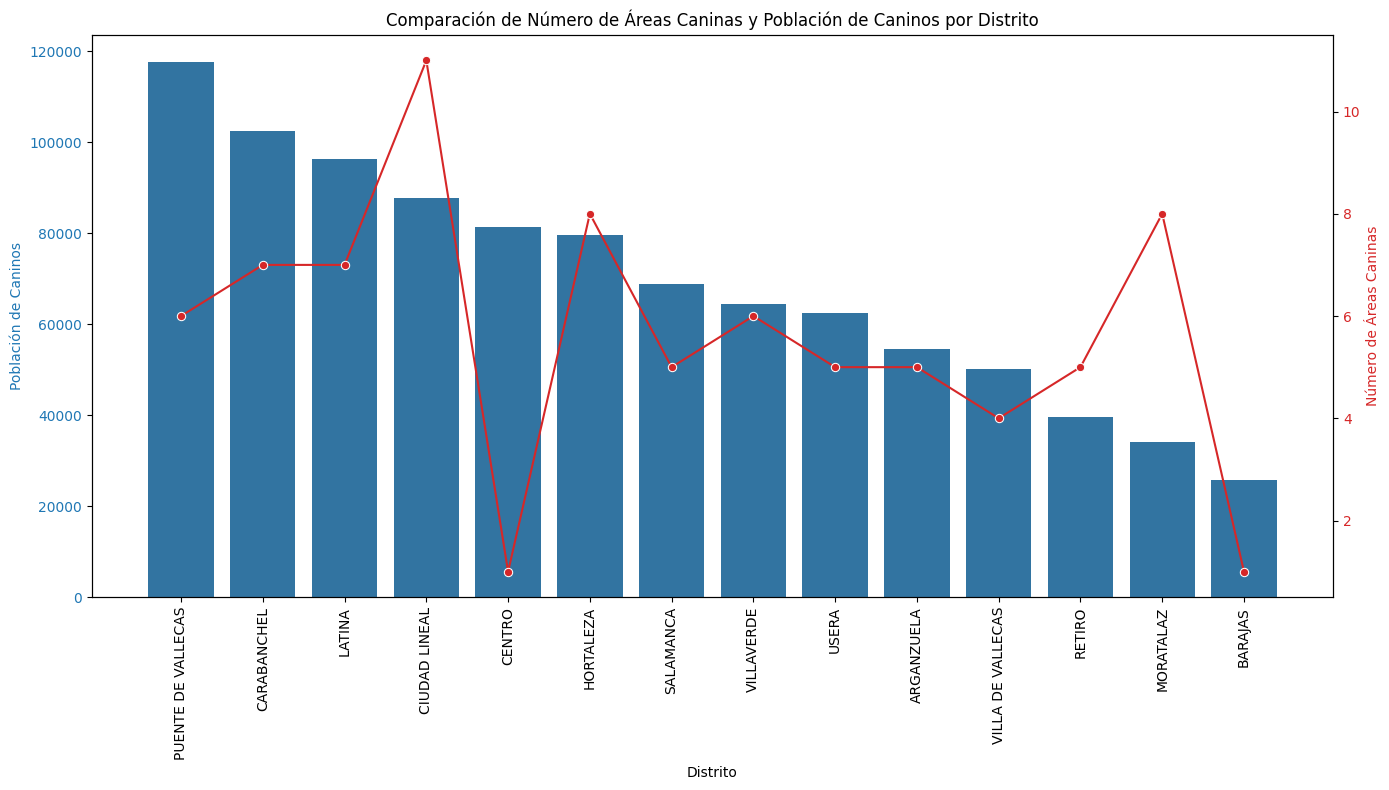

In [65]:
df_can['nombre_distrito'] = df_can['nombre_distrito'].str.upper().str.strip()
df_censo['DISTRITO'] = df_censo['DISTRITO'].str.upper().str.strip()

conteo_distritos = df_can['nombre_distrito'].value_counts().reset_index()
conteo_distritos.columns = ['DISTRITO', 'Número de Áreas Caninas']

total_caninos_por_distrito = df_censo.groupby('DISTRITO')['ESPECIE CANINA'].sum().reset_index()

df_merge = pd.merge(conteo_distritos, total_caninos_por_distrito, on='DISTRITO')
df_merge.sort_values('ESPECIE CANINA', ascending=False, inplace=True)  

fig, ax1 = plt.subplots(figsize=(14, 8))
color = 'tab:blue'
ax1.set_xlabel('Distrito')
ax1.set_ylabel('Población de Caninos', color=color)
sns.barplot(x='DISTRITO', y='ESPECIE CANINA', data=df_merge, color=color, ax=ax1)
ax1.tick_params(axis='y', labelcolor=color)
plt.xticks(rotation=90)
ax2 = ax1.twinx()
color = 'tab:red'
ax2.set_ylabel('Número de Áreas Caninas', color=color)
sns.lineplot(x='DISTRITO', y='Número de Áreas Caninas', data=df_merge, marker='o', sort=False, color=color, ax=ax2)
ax2.tick_params(axis='y', labelcolor=color)
plt.title('Comparación de Número de Áreas Caninas y Población de Caninos por Distrito')
fig.tight_layout()
plt.show()


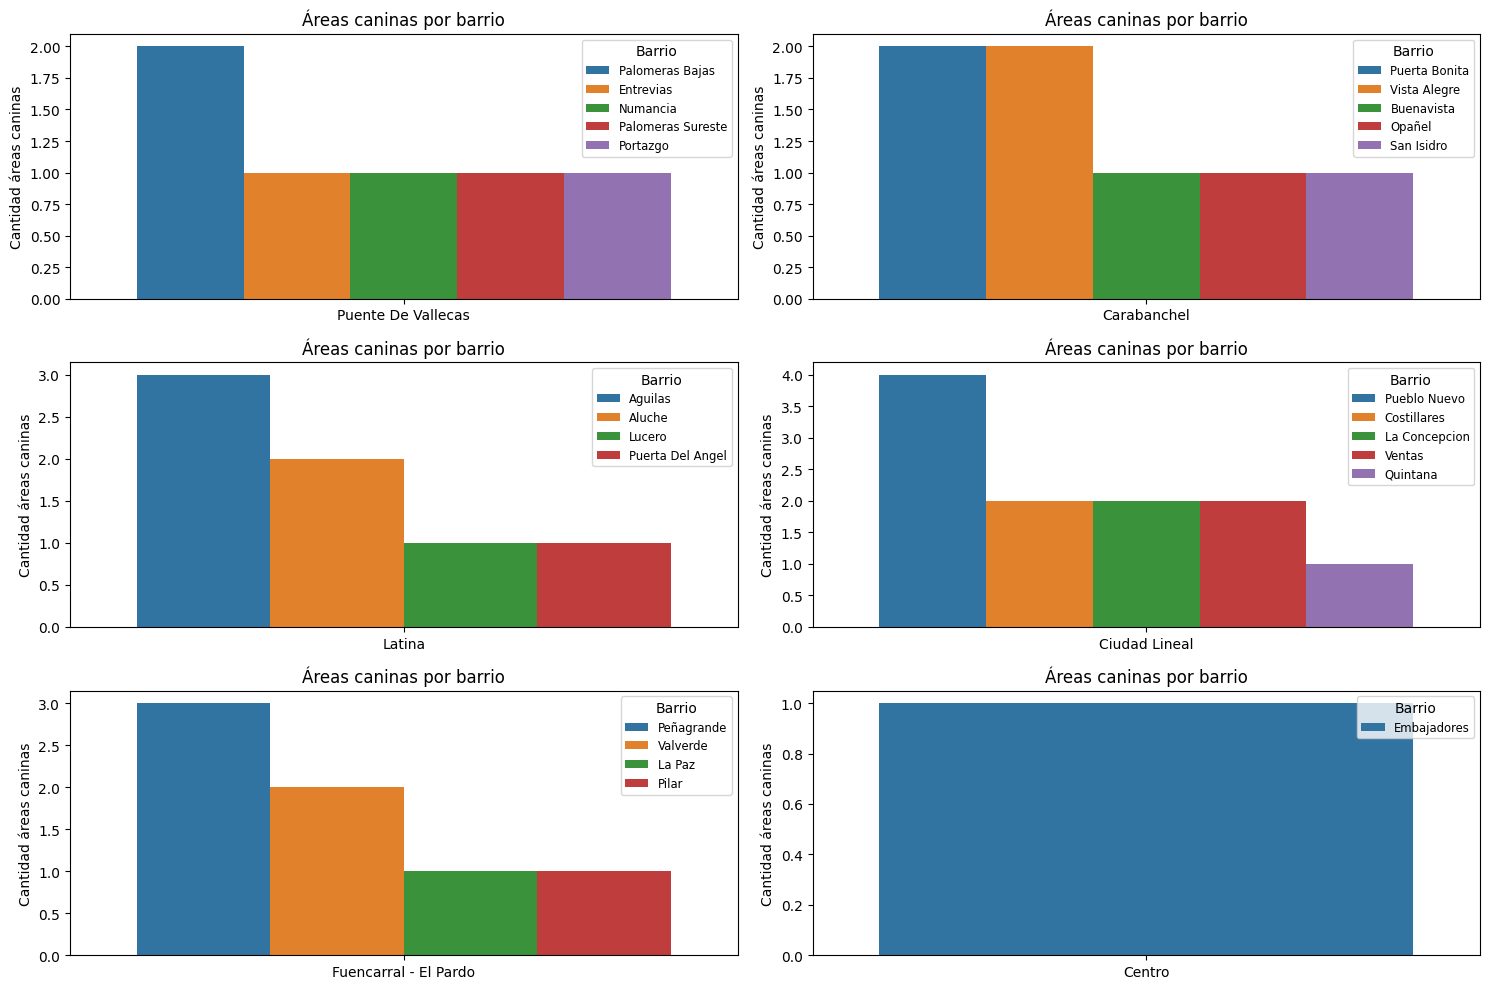

In [66]:
plt.figure(figsize=(15,10))

for indice in range(len(distritos_mayor_cantidad_caninos)):
    plt.subplot(3, 2, indice+1)
    data_distrito = conteo_caninos_distritos[conteo_caninos_distritos['nombre_distrito']==distritos_mayor_cantidad_caninos[indice]]
    
    sns.barplot(data=data_distrito.sort_values(by='cantidad_areas_barrio', ascending=False), x='nombre_distrito', y='cantidad_areas_barrio', hue='nombre_barrio')
    plt.title('Áreas caninas por barrio')
    plt.xlabel('')
    plt.ylabel('Cantidad áreas caninas')
    plt.legend(title='Barrio', fontsize='small')
    plt.xticks()
    plt.tight_layout()
plt.show()

C:\Users\memol\AppData\Local\Temp\ipykernel_22952\1405635966.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['Total Perros y Gatos'] = df_2022['ESPECIE CANINA'] + df_2022['ESPECIE FELINA']
C:\Users\memol\AppData\Local\Temp\ipykernel_22952\1405635966.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='DISTRITO', y='Total Perros y Gatos', data=total_animales_por_distrito, palette='viridis')


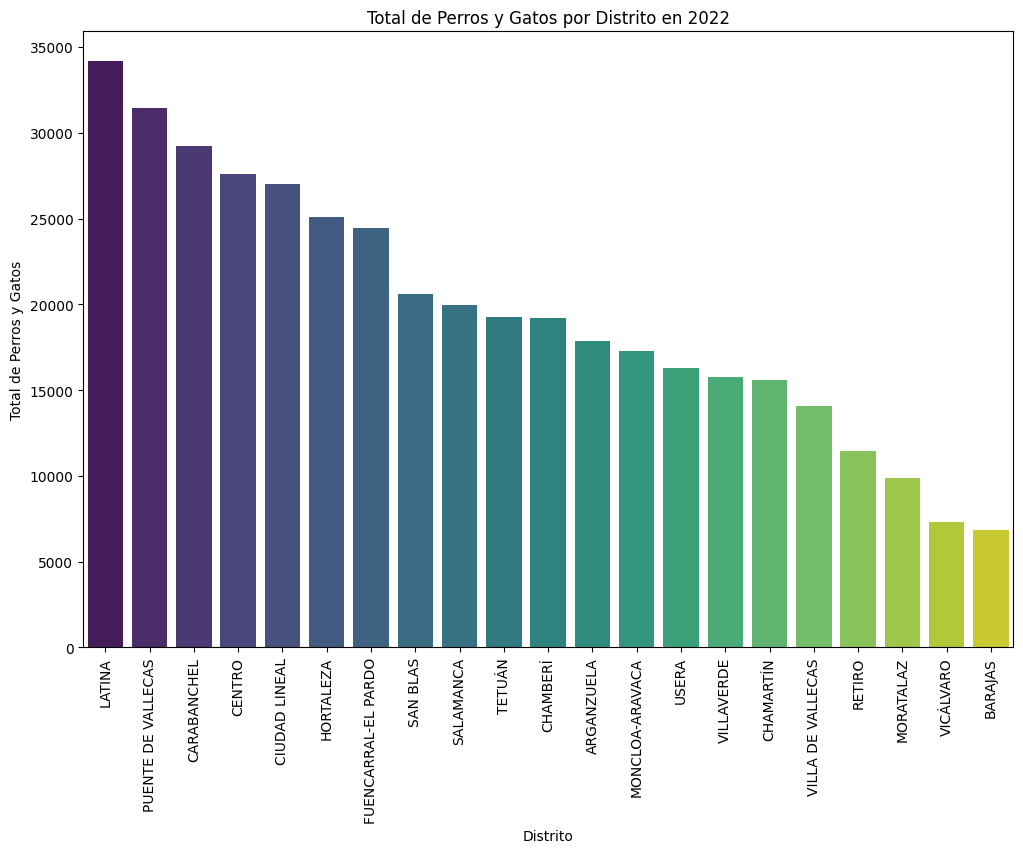

In [67]:
df_2022 = df_censo[df_censo['AÑO'] == 2022]

df_2022['Total Perros y Gatos'] = df_2022['ESPECIE CANINA'] + df_2022['ESPECIE FELINA']

total_animales_por_distrito = df_2022.groupby('DISTRITO')['Total Perros y Gatos'].sum().reset_index()

total_animales_por_distrito = total_animales_por_distrito.sort_values(by='Total Perros y Gatos', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='DISTRITO', y='Total Perros y Gatos', data=total_animales_por_distrito, palette='viridis')
plt.title('Total de Perros y Gatos por Distrito en 2022')
plt.xlabel('Distrito')
plt.ylabel('Total de Perros y Gatos')
plt.xticks(rotation=90)  
plt.show()

In [68]:
df_2022 = df_censo[df_censo['AÑO'] == 2022]

df_2022['Total Perros y Gatos'] = df_2022['ESPECIE CANINA'] + df_2022['ESPECIE FELINA']

total_animales_por_distrito = df_2022.groupby('DISTRITO')['Total Perros y Gatos'].sum().reset_index()

total_animales_por_distrito_sorted = total_animales_por_distrito.sort_values(by='Total Perros y Gatos', ascending=False)

total_animales_por_distrito_sorted

C:\Users\memol\AppData\Local\Temp\ipykernel_22952\522318312.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_2022['Total Perros y Gatos'] = df_2022['ESPECIE CANINA'] + df_2022['ESPECIE FELINA']


,DISTRITO,Total Perros y Gatos
9,LATINA,34199
12,PUENTE DE VALLECAS,31450
2,CARABANCHEL,29253
3,CENTRO,27588
6,CIUDAD LINEAL,27015
8,HORTALEZA,25092
7,FUENCARRAL-EL PARDO,24428
15,SAN BLAS,20581
14,SALAMANCA,19957
16,TETUÁN,19247
